This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [8]:
import tensorflow

In [11]:
tensorflow.keras.datasets.mnist.load_data

<function keras.datasets.mnist.load_data>

In [12]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#1 if I just want to import mnist/ code above == this code

'''
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
'''

In [ ]:
#2 tensorflow --> tf
'''
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
'''

In [15]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images[0].shape

(784,)

In [ ]:
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
train_images = train_images.astype("float32") / 255

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 1.4698 - accuracy: 0.6594
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5861 - accuracy: 0.8540
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4102 - accuracy: 0.8884
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3529 - accuracy: 0.9009
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3232 - accuracy: 0.9075


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
test_digits = test_images[0:10]

In [ ]:
test_digits.shape

(10, 784)

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([2.8798242e-05, 2.7239309e-08, 9.2716573e-06, 3.7209524e-04,
       8.4464932e-07, 1.6646256e-05, 4.0953076e-09, 9.9867636e-01,
       4.3296450e-06, 8.9153863e-04], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99867636

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3067 - accuracy: 0.9109
test_acc: 0.9108999967575073


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

### Vectors (rank-1 tensors)

In [3]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [4]:
x.ndim

1

### Matrices (rank-2 tensors)

In [5]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [6]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [7]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
train_images.ndim

3

In [9]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images.dtype

dtype('uint8')

In [ ]:
2**8 # each values: 0-255

256

**Displaying the fourth digit**

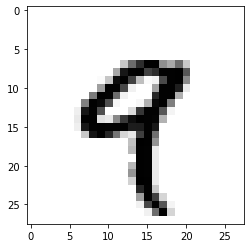

In [12]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [13]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [16]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [17]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [21]:
my_slice = train_images[:, 14:, 14:]

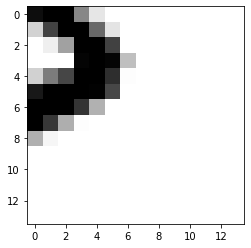

In [22]:
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

In [23]:
my_slice = train_images[:, 7:-7, 7:-7]

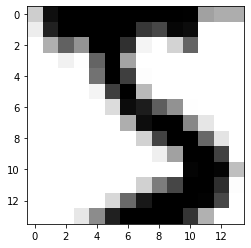

In [24]:
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

### The notion of data batches

In [25]:
batch = train_images[:128]

In [26]:
batch = train_images[128:256]

In [27]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy() # 해당 코드가 없으면 함수 실행 후 x를 출력하면 x의 각 요소값이 바뀌어있음.(아래 설명)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
''' 중요!!!
y = x           -> y와 x가 same memory slot(address)을 share함
                -> if I change x, then y will also be changed
y = x.copy()
'''

In [ ]:
import numpy as np

In [ ]:
x1 = np.array([[1,-2,3], [2,3,-1]])
x1

array([[ 1, -2,  3],
       [ 2,  3, -1]])

In [ ]:
x1.ndim # x1.ndim == len(x1.shape)

2

In [ ]:
x1.shape

(2, 3)

In [ ]:
len(x1.shape)

2

In [ ]:
x1

array([[ 1, -2,  3],
       [ 2,  3, -1]])

In [ ]:
naive_relu(x1)

array([[1, 0, 3],
       [2, 3, 0]])

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

cmp1) coded version of addition and relu

> faster than naive implementation





In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
 
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


cmp2) naive version of addition and relu


> slower than coded version



In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.37 s


### Broadcasting

In [1]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [2]:
X.shape

(32, 10)

In [3]:
y.shape

(10,)

In [4]:
y = np.expand_dims(y, axis=0)

In [5]:
y

array([[0.14251742, 0.57161472, 0.63641202, 0.41835537, 0.19591994,
        0.88408042, 0.54716189, 0.52774173, 0.24062547, 0.80317433]])

In [6]:
Y = np.concatenate([y] * 32, axis=0)

In [7]:
Y.shape

(32, 10)

In [8]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [9]:
# another example for broadcasting

In [10]:
X + y

array([[0.81164408, 1.24577865, 1.16840795, 0.54508029, 0.7303083 ,
        1.74884201, 1.42944226, 1.48361862, 0.27644262, 0.8484886 ],
       [0.59351477, 0.86524038, 1.44600255, 1.34133168, 1.07947398,
        1.34113629, 0.91453668, 1.50535638, 1.16342164, 1.64175519],
       [1.07126933, 0.87606782, 1.28075901, 0.48116146, 1.19244908,
        1.64122391, 1.33392677, 1.13063901, 0.51839027, 1.36919286],
       [0.37011413, 0.85202796, 1.45312342, 0.90551878, 0.86345944,
        1.7176344 , 1.28550789, 0.63607849, 0.56228231, 1.53279279],
       [0.85496137, 0.86520057, 0.75588165, 0.59889152, 0.59884838,
        1.55620407, 1.12335128, 1.5013941 , 0.29081796, 1.53279067],
       [0.35969115, 0.84620821, 1.07849291, 0.66344568, 0.9274742 ,
        1.63214898, 1.2186251 , 1.19881887, 0.69836687, 1.50113793],
       [0.54728358, 1.51217018, 1.32241319, 0.97029965, 0.87800604,
        1.3068355 , 1.19602974, 1.49563439, 1.15228999, 1.10168666],
       [0.7401817 , 1.51051183, 1.0085488

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [1]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [2]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [3]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [4]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [5]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [6]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.05475283, 0.05475283],
        [1.5721148 , 1.5721148 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [23]:
from tensorflow.keras.datasets import mnist

In [24]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [30]:
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0213 - accuracy: 0.9942
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9948
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9953
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0182 - accuracy: 0.9956
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0177 - accuracy: 0.9959


In [29]:
60000/128

468.75

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [33]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [34]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [35]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [36]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [37]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [38]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [39]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [40]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [41]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.11
loss at batch 100: 2.23
loss at batch 200: 2.18
loss at batch 300: 2.06
loss at batch 400: 2.20
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.87
loss at batch 200: 1.81
loss at batch 300: 1.68
loss at batch 400: 1.82
Epoch 2
loss at batch 0: 1.57
loss at batch 100: 1.58
loss at batch 200: 1.49
loss at batch 300: 1.41
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.34
loss at batch 200: 1.23
loss at batch 300: 1.20
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.16
loss at batch 200: 1.03
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.02
loss at batch 200: 0.89
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.78
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [43]:
import numpy as np

In [44]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")
# accuracy가 낮은 이유: BatchGenerator에 shuffled indices가 제공되지 않아서...

accuracy: 0.82


## Summary